In [50]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.model_selection import train_test_split


In [51]:
data = pd.read_csv("C:\\Users\\AANCHAL BORSE\\OneDrive\\Documents\\newpy\\train.csv.zip")


In [52]:
d = np.array(data)
x,y = d.shape
np.random.shuffle(d)
x_train = d[1000:x].T
y_train = x_train[0]
x_train = x_train[1:y]
x_train = x_train/255
x_test = d[0:1000].T
y_test = x_test[0]
x_test = x_test[1:y]
x_test = x_test/255

In [53]:
print(len(d), x_train.shape,  x_test.shape)

42000 (784, 41000) (784, 1000)


In [54]:
def  initialize_parameters():
    W1 = np.random.rand(10, 784) *0.01 
    B1 = np.random.rand(10, 1) *0.01 
    W2 = np.random.rand(10, 10) *0.01 
    B2 = np.random.rand(10, 1) *0.01   
    return W1, B1, W2, B2

In [55]:
def relu(Z):
    return np.maximum(Z,0)

def softmx(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [56]:
def forward_prop(W1, B1, W2, B2, X):
    Z1 = W1.dot(X) + B1 
    A1 = relu(Z1) 
    Z2 = W2.dot(A1) + B2 
    A2 = softmx(Z2) 
    return Z1, A1, Z2, A2

In [57]:
def label_encoded (Y):
    label_encoded = np.zeros((Y.size, Y.max() + 1))
    label_encoded[np.arange(Y.size), Y] = 1
    label_encoded = label_encoded.T
    return label_encoded
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    m = Y.size
    prob_Y = label_encoded (Y)
    dZ2 = A2 - prob_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    dB2 = 1/m * np.sum(dZ2)  
    dZ1 = W2.T.dot(dZ2) * (Z1 > 0)  
    dW1 = 1/m * dZ1.dot(X.T)
    dB1 =1/m  * np.sum(dZ1)    
    return dW1, dB1, dW2, dB2

In [58]:
def update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha):
    W1 = W1 - alpha * dW1
    B1 = B1 - alpha * dB1
    W2 = W2 - alpha * dW2
    B2 = B2 - alpha * dB2
    return W1, B1, W2, B2

In [59]:
def get_predictions(A2):
    return np.argmax(A2, 0)
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size
def gradient_descent(X, Y, epochs, alpha):
    W1, B1, W2, B2 =  initialize_parameters()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, B1, W2, B2, X)
        dW1, dB1, dW2, dB2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, B1, W2, B2 = update_params(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)
        if i % 10 == 0 :
          print('epoch',i)
          predictions = get_predictions(A2)
          print('accuracy',get_accuracy(get_predictions(A2), Y))
    return W1, B1, W2, B2

In [63]:
W1, B1, W2, B2 = gradient_descent(x_train, y_train, 500, 0.05)

epoch 0
accuracy 0.10536585365853658
epoch 10
accuracy 0.09802439024390244
epoch 20
accuracy 0.09802439024390244
epoch 30
accuracy 0.09802439024390244
epoch 40
accuracy 0.09802439024390244
epoch 50
accuracy 0.09802439024390244
epoch 60
accuracy 0.09802439024390244
epoch 70
accuracy 0.09802439024390244
epoch 80
accuracy 0.09804878048780488
epoch 90
accuracy 0.09804878048780488
epoch 100
accuracy 0.09870731707317074
epoch 110
accuracy 0.1
epoch 120
accuracy 0.10158536585365853
epoch 130
accuracy 0.10324390243902438
epoch 140
accuracy 0.10465853658536585
epoch 150
accuracy 0.10653658536585366
epoch 160
accuracy 0.11107317073170732
epoch 170
accuracy 0.13353658536585367
epoch 180
accuracy 0.14846341463414633
epoch 190
accuracy 0.16029268292682927
epoch 200
accuracy 0.17841463414634146
epoch 210
accuracy 0.20021951219512196
epoch 220
accuracy 0.2284390243902439
epoch 230
accuracy 0.25709756097560976
epoch 240
accuracy 0.282390243902439
epoch 250
accuracy 0.31853658536585366
epoch 260
accura

In [66]:
def make_predictions(X, W1, B1, W2, B2):
    _,_,_,A2 = forward_prop(W1, B1, W2, B2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, B1, W2, B2):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, B1, W2, B2)
    label = y_train[index]
    print("Prediction : ", prediction)
    print("Label : ", label)
    
    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction :  [1]
Label :  1


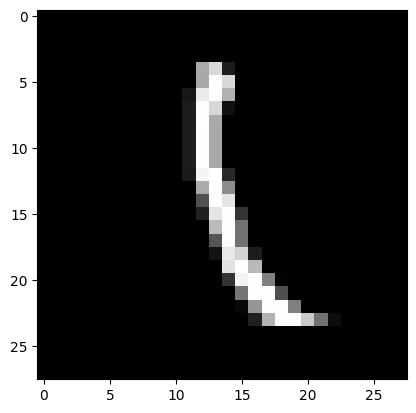

In [67]:
test_prediction(154, W1, B1, W2, B2,)